## Examples

### Fig. 4 - comparison with DIRECTFN-tri

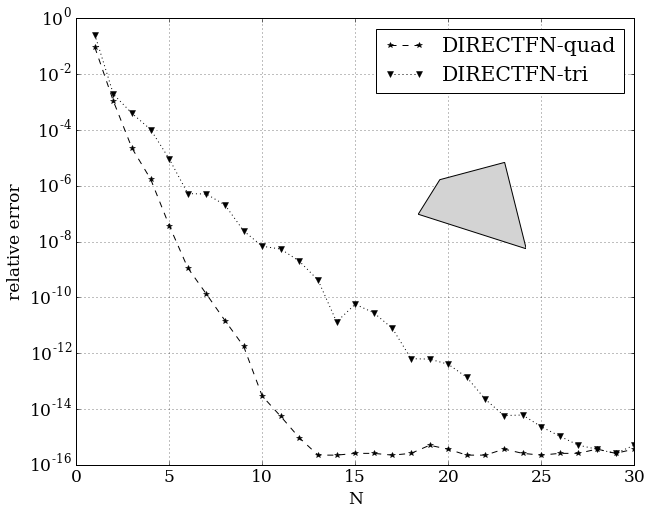

In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline
from matplotlib.patches import Polygon

quad = Polygon ([(0.0, 0.4), (1, 0), (0.8, 1), (0.2, 0.8)])


ST_quad_arb = np.loadtxt("Results_tri_vs_quad_ST.txt")[:, 1]
ST_tri_arb = np.loadtxt("Results_tri_vs_quad_ST.txt")[:, 3]


font = {'family' : 'serif',
        'size'   : 17,
       'weight' : 'normal'}

plt.rc('font', **font)
fig_ST_arb = plt.figure(figsize = (10,8))

plt.subplot(111)
plt.yscale("log")
N = xrange(1,np.shape(ST_quad_arb)[0]+1)

plt.plot(N,ST_quad_arb,color = "k",linestyle = '--', marker = '*', label = "DIRECTFN-quad")
plt.plot(N,ST_tri_arb,color = "k", linestyle = ':',marker = 'v', label = "DIRECTFN-tri")


plt.xlabel("N")
plt.ylabel("relative error")
#plt.title("Comparison with DIRECTFN for triangles")
plt.grid(True)
plt.legend()

ax = plt.axes([0.6, 0.5, 0.15, 0.15])
ax.add_patch (quad)
quad.set_facecolor('lightgrey')
ax.axis('off')

plt.show()

fig_ST_arb.savefig('Error_st_const.eps')

### CPU time comparison

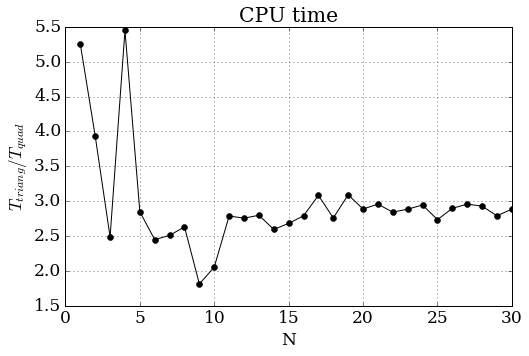

In [2]:
quad_ST =  np.loadtxt("Results_tri_vs_quad_ST.txt")[:, 2]
tri_ST = np.loadtxt("Results_tri_vs_quad_ST.txt")[:, 4]


fig = plt.figure(figsize = (8,5))
plt.subplot(111)
N = xrange(1, quad_ST.shape[0]+1)
plt.plot(N,tri_ST[:]/quad_ST[:],color = "k",marker = 'o')

plt.xlabel("N")
plt.ylabel("$T_{triang}/T_{quad}$")
    #plt.yscale("log")
plt.title("CPU time")
plt.grid(True)

fig.savefig("time_ST_only.jpg")


### Fig. 5 - Convergence with one varying order

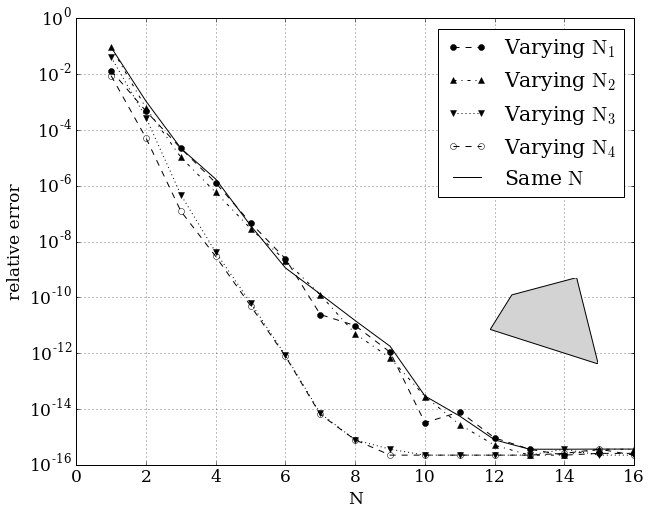

In [3]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline
from matplotlib.patches import Polygon

quad = Polygon ([(0.0, 0.4), (1, 0), (0.8, 1), (0.2, 0.8)])


data_ST_const = np.loadtxt("Results_st_one_param_const.txt")


fig_ST_const = plt.figure(figsize = (10,8))
font = {'family' : 'serif',
        'size'   : 17,
       'weight' : 'normal'}

plt.rc('font', **font)

plt.subplot(111)
plt.yscale("log")
N = xrange(1,np.shape(data_ST_const)[0]+1)

plt.axis([0.,16.,1e-16,1.])

plt.plot(N,data_ST_const[:,2],color = "k",marker = 'o',linestyle = '--', label = 'Varying $\mathrm{N_1}$')
plt.plot(N,data_ST_const[:,3],color = "k",marker = '^',linestyle = '-.', label = 'Varying $\mathrm{N_2}$')
plt.plot(N,data_ST_const[:,4],color = "k",marker = 'v',linestyle = ':', label = 'Varying $\mathrm{N_3}$')
plt.plot(N,data_ST_const[:,5],color = "k",marker = 'o',markerfacecolor = 'none',linestyle = '--', label = 'Varying $\mathrm{N_4}$')
plt.plot(N,data_ST_const[:,1],color = "k", label = 'Same $\mathrm{N}$')

plt.xlabel("N")
plt.ylabel("relative error")
plt.grid(True)
plt.legend()

ax = plt.axes([0.7, 0.3, 0.15, 0.15])
ax.add_patch (quad)
quad.set_facecolor('lightgrey')
ax.axis('off')


fig_ST_const.savefig('Error_st_one_param_const.eps')

### Convergence test with curvilinear element

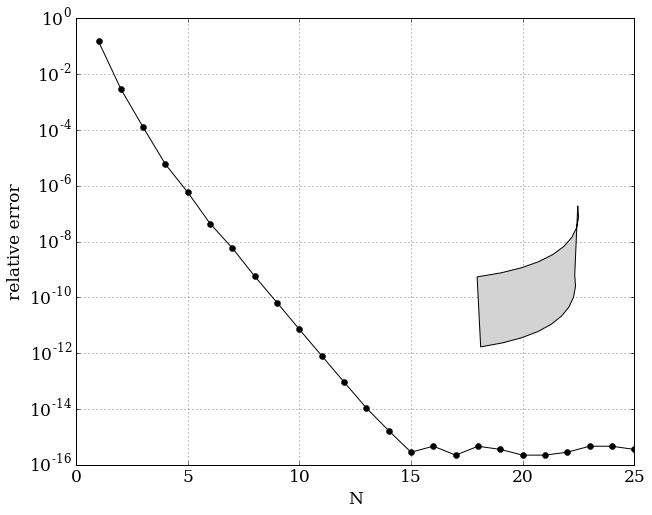

In [4]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.patches import Circle, PathPatch
# register Axes3D class with matplotlib by importing Axes3D
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D

% matplotlib inline

from matplotlib.ticker import LinearLocator


ST_curv = np.loadtxt("Results_st_curv.txt")[:, 1]


fig_ST_curv = plt.figure(figsize = (10,8))

plt.subplot(111)
plt.yscale("log")
N = xrange(1,np.shape(ST_curv)[0]+1)

font = {'family' : 'serif',
        'size'   : 17,
       'weight' : 'normal'}

plt.rc('font', **font)

plt.plot(N,ST_curv,marker = 'o', linestyle = '-', color = "k", label = 'ST case')
#plt.legend()

plt.xlabel("N")
plt.ylabel("relative error")
#plt.title("Comparison with DIRECTFN for triangles")
plt.grid(True)

ax = plt.axes([0.6, 0.3, 0.3, 0.3],projection='3d')
ax.patch.set_alpha(0.0)




def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):

    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "x":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size, usetex=usetex)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)




# Make data.
u = np.linspace(-1, 1, 10)

v = np.linspace(-1, 1, 10)

u, v = np.meshgrid(u, v)


d = 1
dd = d / np.sqrt((2.0))
r1 =  [ 0.0, d,0.0  ]
r2 = [ d,0.0,0.0  ]
r3 = [d,0.0,d  ]
r4 = [0.0, d, d ]

r5 = [dd,dd,0.0  ]
r6 = [d, 0.0, 0.5*d ]
r7 = [dd,dd,d ]
r8 = [0.0,d,0.5*d]
r9 = [ dd,dd,0.5*d ]

N11 = (1 - u)*(1 - v)*u*v / (4.0)
N21 = -(1 - u*u)*(1 - v)*v / (2.0)
N31 = -(1 + u)*(1 - v)*u*v / (4.0)
N12 = -(1 - u)*(1 - v*v)*u / (2.0)
N22 = (1 - u*u)*(1 - v*v)
N32 = (1 + u)*(1 - v*v)*u / (2.0)

N13 = -(1 - u)*(1 + v)*u*v / (4.0)
N23 = (1 - u*u)*(1 + v)*v/ (2.0)
N33 = (1 + u)*(1 + v)*u*v / (4.0)
    
Q1 = np.zeros((3,np.int(N11.shape[0]), np.int(N11.shape[1])))
for i in xrange(Q1.shape[0]):
    Q1[i,:,:] = r1[i]*N11 + r5[i]*N21 + r2[i]*N31 + r8[i]*N12 + r9[i]*N22 + r6[i]*N32 + r4[i]*N13 + r7[i]*N23 + r3[i]*N33
    

surf1 = ax.plot_surface(Q1[0,:,:],Q1[1,:,:],Q1[2,:,:], color = 'lightgrey',shade = False )


# Customize the z axis.
ax.set_zlim(0, 1)
#ax.w_zaxis.set_major_locator(LinearLocator(6))

#plt.xlim([-400, 400])
#plt.ylim([-400, 400])
ax.axis('off')
ax.view_init(elev=42., azim=-9.)

#ax.text(0.8, -0.6, 0.3, "$\mathrm{Q_2}$", zdir = (0, 1, 0.))
#ax.text(0.8, -0.6, 1.3, "$\mathrm{Q_3}$", zdir = (0, 1, 0.))
#ax.text(0.8, 0.3, 0.3, "$\mathrm{Q_1}$", zdir = (0, 1, 0.))


plt.show()


fig_ST_curv.savefig('Error_curv_st.eps')